In [1]:
import os

# Create folders if they don't exist
os.makedirs("../reports/figures", exist_ok=True)
os.makedirs("../data/processed", exist_ok=True)

print("✅ Folder structure ready!")


✅ Folder structure ready!


In [2]:
import pandas as pd

# Load your sales data
data_path = "../data/processed/sample_sales.csv"
df = pd.read_csv(data_path, encoding='utf-16')
   # using utf-8 to avoid decode errors

# Display first few rows
df.head()


,date,sales
0,2021-01-01,200
1,2021-01-02,250
2,2021-01-03,190
3,2021-01-04,220
4,2021-01-05,270


In [3]:
# Step 6.1: View first few rows
df.head()

# Step 6.2: Check basic info (column names, data types, nulls)
df.info()

# Step 6.3: Summary statistics for numeric columns
df.describe()

# Step 6.4: Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   sales   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


date     0
sales    0
dtype: int64

In [4]:
# Step 7: Data Cleaning & Preprocessing

# Rename columns if necessary (standard Prophet format)
# Prophet needs: 'ds' = date column, 'y' = value to forecast
df = df.rename(columns={
    'date': 'ds',          # rename your date column to 'ds'
    'sales': 'y'           # rename your sales/target column to 'y'
})

# Convert date column to datetime
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')

# Drop rows where date or sales is missing
df = df.dropna(subset=['ds', 'y'])

# Sort by date
df = df.sort_values('ds')

print("✅ Data cleaned and ready!")
print(df.head())


✅ Data cleaned and ready!
          ds    y
0 2021-01-01  200
1 2021-01-02  250
2 2021-01-03  190
3 2021-01-04  220
4 2021-01-05  270


In [5]:
from prophet import Prophet

# Step 8: Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

print("✅ Prophet model trained successfully!")


C:\Users\Satish P\Desktop\Hasini ML\FUTURE_ML_01\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:17:17 - cmdstanpy - INFO - Chain [1] start processing
21:17:17 - cmdstanpy - INFO - Chain [1] done processing


✅ Prophet model trained successfully!


In [6]:
# Step 9: Create a dataframe for future predictions (next 90 days)
future = model.make_future_dataframe(periods=90)

# Generate forecast
forecast = model.predict(future)

# Display forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
95,2021-04-06,1304.593030,1276.819673,1332.008723
96,2021-04-07,1316.168669,1288.265961,1342.721823
97,2021-04-08,1327.744309,1300.071618,1354.084784
98,2021-04-09,1339.319948,1311.505930,1366.749214
99,2021-04-10,1350.895587,1323.276882,1376.305271


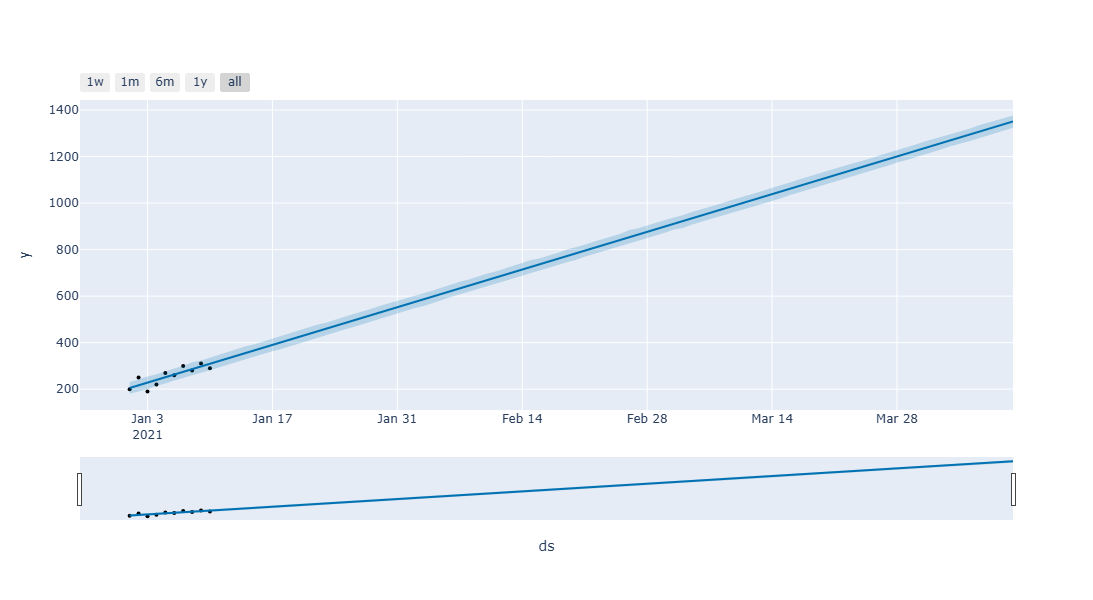

In [7]:
from prophet.plot import plot_plotly, plot_components_plotly

# Step 10A: Interactive forecast plot
fig1 = plot_plotly(model, forecast)
fig1.show()


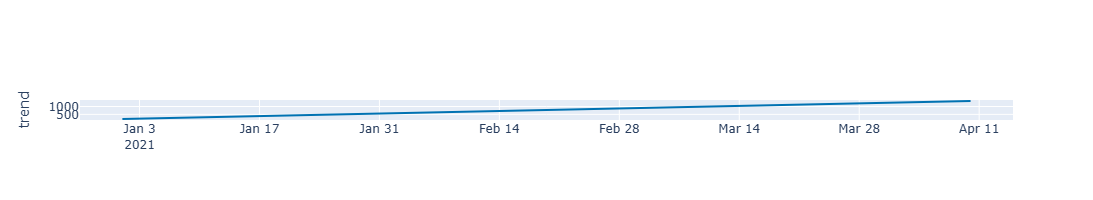

In [8]:
# Step 11: Plot forecast components (trend, seasonality, etc.)
from prophet.plot import plot_components_plotly

fig2 = plot_components_plotly(model, forecast)
fig2.show()
